In [1]:
# Import everything needed
import numpy as np
import matplotlib.pyplot as plt
from gurobipy import *
import time

def plot_locations_and_edges(Edges):
    for (i,j) in Edges:
        plt.plot([location[i,0], location[j,0]], [location[i,1], location[j,1]], color = "blue", linestyle = "dashed", linewidth= 0.5)
    x,y = np.transpose(location);

    plt.scatter(x,y, color = "red");
    plt.xlabel("x-coordinate")
    plt.ylabel("y-coordinate")
    plt.title("Matchings of Rival Teams")
    plt.show()

In [2]:
# Load Instance

#instance = "sp11"
instance = "uscap"
#instance = "sgb128"

# Load Names
f=open("data/" + instance + "_name.txt", "r")
names = f.readlines()
names = [name.rstrip("\n") for name in names]

#Load Locations
location = np.loadtxt("data/" + instance + "_xy.txt")

#Load Distances
distance = np.loadtxt("data/" + instance + "_dist.txt")

n = len(names)

Academic license - for non-commercial use only
Optimize a model with 101 rows, 2500 columns and 5050 nonzeros
Variable types: 0 continuous, 2500 integer (2500 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 3e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 34312.032690
Presolve removed 101 rows and 2500 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 4830.95 34312 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.830954822698e+03, best bound 4.830954822698e+03, gap 0.0000%
Time to run code:  0.11873299999999998


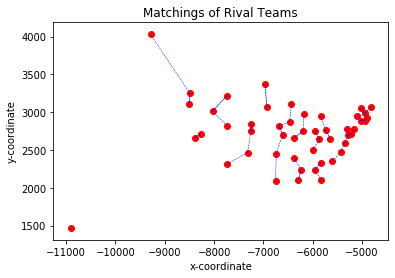

In [3]:
################
# Start the timer
start = time.clock()
################

### Input your model here

# Create a new model
m = Model("NFL-Rivals Model")

# Create set
I = range(n)

# Create variables
x = m.addVars(I,I, vtype=GRB.BINARY, name="x")

# Set objective
m.setObjective(0.5*sum(distance[i,j]*x[i,j] for i in I for j in I), GRB.MINIMIZE)

# Add constraint: 
m.addConstr(sum(x[i,j] for i in I for j in I) >= n-1, "at least (n-1)/2 pairs")

#Add constraint: no city connected to itself
m.addConstrs((x[i,i]==0 for i in I), "No city connected to itself")

#Add constraint: At most 1 rival for each city
m.addConstrs((sum(x[i,j] for j in I) <=1 for i in I), "Rivals")

# Optimize model
m.optimize()

#End the timer
end = time.clock()
print("Time to run code: ", end - start)
################

#Extract the solution and plot it
x_sol = [ [ x[(i,j)].x for i in I] for j in I]
edges = [(i,j) for i in I for j in I if x_sol[i][j] ==1]
plot_locations_and_edges(edges)

# Random Instances

In [4]:
# Random instances:

# this constructs a random distance matrix
def rand_distance(n):
    A  = np.random.randint(100, size=(n, n))
    A = A + A + 1
    for i in range(n):
        A[i,i] = 0
    return A
        

# Time each run
sizes = [10*i for i in range(1,31)] + [1000]
times = np.zeros([len(sizes)])

for j in range(len(sizes)):
    n = sizes[j]
    distance = rand_distance(n)
    
    ################
    # Start the timer
    start = time.clock()
    ################

    # Create a new model
    m = Model("NFL-Rivals Model")
    m.setParam("OutputFlag",0)
    # Create set
    I = range(n)
    
    # Create variables
    x = m.addVars(I,I, vtype=GRB.BINARY, name="x")

    # Set objective
    m.setObjective(0.5*sum(distance[i,j]*x[i,j] for i in I for j in I), GRB.MINIMIZE)

    # Add constraint: 
    m.addConstr(sum(x[i,j] for i in I for j in I) >= n-1, "at least (n-1)/2 pairs")

    #Add constraint: no city connected to itself
    m.addConstrs((x[i,i]==0 for i in I), "No city connected to itself")

    #Add constraint: At most 1 rival for each city
    m.addConstrs((sum(x[i,j] for j in I) <=1 for i in I), "Rivals")

    # Optimize model
    m.optimize()

################
    #End the timer
    end = time.clock()
    times[j] = end - start
################

plt.scatter(sizes,times)
plt.xlabel("Size of instance")
plt.ylabel("Time to solve instance")
plt.title("Solution times of Matching Problem");

# create 1000 equally spaced points between -10 and 10
x = np.linspace(0, n, 1000)

# calculate the y value for each element of the x vector
y = 0.00004*x**2 


plt.plot(x, y, color = "green")
plt.legend(["y = 0.00004*x**2","solve times"])


KeyboardInterrupt: 

In [ ]:
# Previously computed run times
times = [7.50100000e-02, 1.86590000e-02, 3.76530000e-02, 6.55640000e-02,
       9.24220000e-02, 1.31711000e-01, 1.79213000e-01, 2.29969000e-01,
       7.13742000e-01, 3.89647000e-01, 4.98939000e-01, 5.94722000e-01,
       6.87888000e-01, 7.57945000e-01, 8.96916000e-01, 1.03419300e+00,
       1.22052400e+00, 1.70963900e+00, 1.57993900e+00, 1.71035200e+00,
       2.00378200e+00, 2.38150600e+00, 2.29569300e+00, 2.45584700e+00,
       2.97761100e+00, 2.90555300e+00, 3.56060900e+00, 3.51006500e+00,
       3.78492300e+00, 4.37639300e+00, 1.74059483e+02]

In [ ]:
sizes = [  10,   20,   30,   40,   50,   60,   70,   80,   90,  100,  110,
        120,  130,  140,  150,  160,  170,  180,  190,  200,  210,  220,
        230,  240,  250,  260,  270,  280,  290,  300, 1000]

In [ ]:
plt.scatter(sizes[:-1],times[:-1])
plt.xlabel("Size of instance")
plt.ylabel("Time to solve instance")
plt.title("Solution times of Matching Problem");

# create 1000 equally spaced points between -10 and 10
x = np.linspace(0, sizes[-2], 1000)

# calculate the y value for each element of the x vector
y = 0.00004*x**2 


plt.plot(x, y, color = "green")
plt.legend(["y = 0.00004*x**2","solve times"])

In [ ]:
plt.scatter(sizes,times)
plt.xlabel("Size of instance")
plt.ylabel("Time to solve instance")
plt.title("Solution times of Matching Problem");

# create 1000 equally spaced points between -10 and 10
x = np.linspace(0, n, 1000)

# calculate the y value for each element of the x vector
y = 0.00004*x**2 


plt.plot(x, y, color = "green")
plt.legend(["y = 0.00004*x**2","solve times"])